In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df_chelsea_2019_2020 = pd.read_csv("df_matches_Chelsea_PL_2019_2020.csv", index_col=0)


* lat :  Latitude
* lng:   Longitude
* desc: Description de l'appel
* zip:  Zipcode
* title: titre
* timeStamp: date
* twp: ville
* addr: adresse
* e: variable qui ne sert à rien^^


In [3]:
df_chelsea_2019_2020.head()

,Date,Time,Comp,Round,Day,Venue,Result,GF,GA,Opponent,xG,xGA,Poss,Attendance,Captain,Formation,Referee,Match Report,Notes,Team
0,2019-08-11,16:30,Premier League,Matchweek 1,Sun,Away,L,0,4,Manchester Utd,1.0,2.2,54,73620.0,César Azpilicueta,4-2-3-1,Anthony Taylor,Match Report,NaN,Chelsea
2,2019-08-18,16:30,Premier League,Matchweek 2,Sun,Home,D,1,1,Leicester City,1.1,0.8,50,40629.0,César Azpilicueta,4-3-3,Oliver Langford,Match Report,NaN,Chelsea
3,2019-08-24,12:30,Premier League,Matchweek 3,Sat,Away,W,3,2,Norwich City,1.5,1.1,54,27032.0,César Azpilicueta,4-3-3,Martin Atkinson,Match Report,NaN,Chelsea
4,2019-08-31,15:00,Premier League,Matchweek 4,Sat,Home,D,2,2,Sheffield Utd,2.0,1.1,62,40560.0,César Azpilicueta,4-3-3,Stuart Attwell,Match Report,NaN,Chelsea
5,2019-09-14,15:00,Premier League,Matchweek 5,Sat,Away,W,5,2,Wolves,2.7,1.7,54,31534.0,César Azpilicueta,3-4-3,Graham Scott,Match Report,NaN,Chelsea


In [4]:
df_chelsea_2019_2020.shape

(38, 20)

### commentaire ********************************************************

In [5]:
df_chelsea_resultat=df_chelsea_2019_2020.groupby(['Team','Result'])['Result'].count().rename('nbr_matchs').reset_index()
df_chelsea_resultat

,Team,Result,nbr_matchs
0,Chelsea,D,6
1,Chelsea,L,12
2,Chelsea,W,20


### Commentaire *******************************************************************

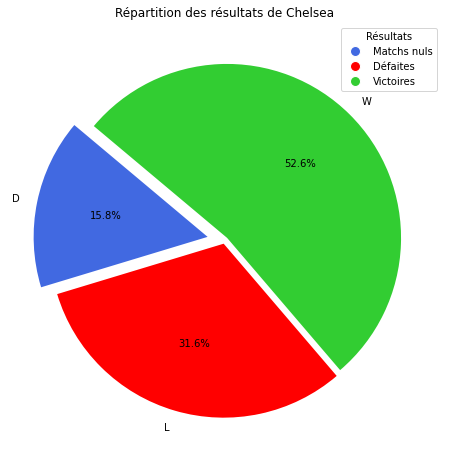

In [6]:
# Données
labels = df_chelsea_resultat['Result']
data = df_chelsea_resultat['nbr_matchs']

# Couleurs significatives
colors = {'W': 'limegreen', 'L': 'red', 'D': 'royalblue'}

# Explosion
explode = [0.1, 0.02, 0.02]

# Créer le diagramme circulaire
plt.figure(figsize=(8, 8))
plt.pie(data, labels=labels, autopct='%1.1f%%', startangle=140, colors=[colors[r] for r in labels], explode=explode)

# Titre
plt.title('Répartition des résultats de Chelsea')

# Légende explicative
legend_labels = {'W': 'Victoires', 'L': 'Défaites', 'D': 'Matchs nuls'}
legend_handles = [plt.Line2D([0], [0], marker='o', color='w', label=legend_labels[result], 
                    markersize=10, markerfacecolor=colors[result]) for result in labels]

plt.legend(handles=legend_handles, title='Résultats', loc='upper right')

# Afficher le diagramme
plt.show()


#### Commentaire ************************* Etude des resultat de Chelsea a democile et a l'ecterieur 

In [7]:
df_chelsea_HA=df_chelsea_2019_2020.groupby(['Team','Venue','Result'])['Result'].count().rename('nbr_matchs').reset_index()
df_chelsea_HA

,Team,Venue,Result,nbr_matchs
0,Chelsea,Away,D,3
1,Chelsea,Away,L,7
2,Chelsea,Away,W,9
3,Chelsea,Home,D,3
4,Chelsea,Home,L,5
5,Chelsea,Home,W,11


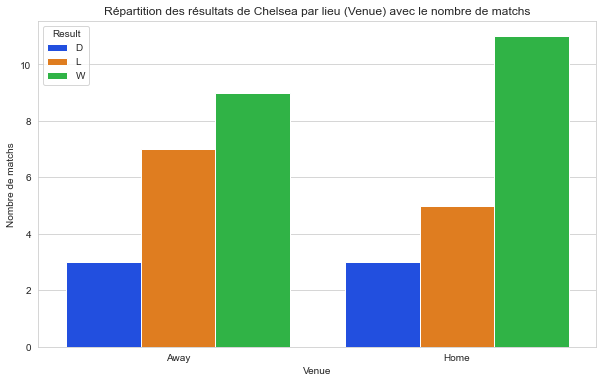

In [8]:
# Données
data = df_chelsea_HA

# Créer le barplot
plt.figure(figsize=(10, 6))
sns.set_style("whitegrid")  # Style du graphique

# Utilisez `hue` pour différencier les résultats (D, L, W) dans le même graphique
sns.barplot(data=data, x="Venue", y="nbr_matchs", hue="Result", palette="bright")

plt.ylabel("Nombre de matchs")
plt.title("Répartition des résultats de Chelsea par lieu (Venue) avec le nombre de matchs")
# Afficher le graphique
plt.show()


### Commentaire *******************************************************************

In [9]:
df_chelsea_2019_2020.head()

,Date,Time,Comp,Round,Day,Venue,Result,GF,GA,Opponent,xG,xGA,Poss,Attendance,Captain,Formation,Referee,Match Report,Notes,Team
0,2019-08-11,16:30,Premier League,Matchweek 1,Sun,Away,L,0,4,Manchester Utd,1.0,2.2,54,73620.0,César Azpilicueta,4-2-3-1,Anthony Taylor,Match Report,NaN,Chelsea
2,2019-08-18,16:30,Premier League,Matchweek 2,Sun,Home,D,1,1,Leicester City,1.1,0.8,50,40629.0,César Azpilicueta,4-3-3,Oliver Langford,Match Report,NaN,Chelsea
3,2019-08-24,12:30,Premier League,Matchweek 3,Sat,Away,W,3,2,Norwich City,1.5,1.1,54,27032.0,César Azpilicueta,4-3-3,Martin Atkinson,Match Report,NaN,Chelsea
4,2019-08-31,15:00,Premier League,Matchweek 4,Sat,Home,D,2,2,Sheffield Utd,2.0,1.1,62,40560.0,César Azpilicueta,4-3-3,Stuart Attwell,Match Report,NaN,Chelsea
5,2019-09-14,15:00,Premier League,Matchweek 5,Sat,Away,W,5,2,Wolves,2.7,1.7,54,31534.0,César Azpilicueta,3-4-3,Graham Scott,Match Report,NaN,Chelsea


In [10]:
df_chelsea_2019_2020['Date'].head()

0    2019-08-11
2    2019-08-18
3    2019-08-24
4    2019-08-31
5    2019-09-14
Name: Date, dtype: object

In [52]:
df_chelsea_2019_2020['Date'] = pd.to_datetime(df_chelsea_2019_2020['Date'])
df_chelsea_2019_2020.head()

,Date,Time,Comp,Round,Day,Venue,Result,GF,GA,Opponent,xG,xGA,Poss,Attendance,Captain,Formation,Referee,Match Report,Notes,Team
0,2019-08-11,16:30,Premier League,Matchweek 1,Sun,Away,L,0,4,Manchester Utd,1.0,2.2,54,73620.0,César Azpilicueta,4-2-3-1,Anthony Taylor,Match Report,NaN,Chelsea
2,2019-08-18,16:30,Premier League,Matchweek 2,Sun,Home,D,1,1,Leicester City,1.1,0.8,50,40629.0,César Azpilicueta,4-3-3,Oliver Langford,Match Report,NaN,Chelsea
3,2019-08-24,12:30,Premier League,Matchweek 3,Sat,Away,W,3,2,Norwich City,1.5,1.1,54,27032.0,César Azpilicueta,4-3-3,Martin Atkinson,Match Report,NaN,Chelsea
4,2019-08-31,15:00,Premier League,Matchweek 4,Sat,Home,D,2,2,Sheffield Utd,2.0,1.1,62,40560.0,César Azpilicueta,4-3-3,Stuart Attwell,Match Report,NaN,Chelsea
5,2019-09-14,15:00,Premier League,Matchweek 5,Sat,Away,W,5,2,Wolves,2.7,1.7,54,31534.0,César Azpilicueta,3-4-3,Graham Scott,Match Report,NaN,Chelsea


In [53]:
df_chelsea_2019_2020['date_match'] = df_chelsea_2019_2020['Date'].dt.month
df_chelsea_2019_2020.head()

,Date,Time,Comp,Round,Day,Venue,Result,GF,GA,Opponent,...,xGA,Poss,Attendance,Captain,Formation,Referee,Match Report,Notes,Team,date_match
0,2019-08-11,16:30,Premier League,Matchweek 1,Sun,Away,L,0,4,Manchester Utd,...,2.2,54,73620.0,César Azpilicueta,4-2-3-1,Anthony Taylor,Match Report,NaN,Chelsea,8
2,2019-08-18,16:30,Premier League,Matchweek 2,Sun,Home,D,1,1,Leicester City,...,0.8,50,40629.0,César Azpilicueta,4-3-3,Oliver Langford,Match Report,NaN,Chelsea,8
3,2019-08-24,12:30,Premier League,Matchweek 3,Sat,Away,W,3,2,Norwich City,...,1.1,54,27032.0,César Azpilicueta,4-3-3,Martin Atkinson,Match Report,NaN,Chelsea,8
4,2019-08-31,15:00,Premier League,Matchweek 4,Sat,Home,D,2,2,Sheffield Utd,...,1.1,62,40560.0,César Azpilicueta,4-3-3,Stuart Attwell,Match Report,NaN,Chelsea,8
5,2019-09-14,15:00,Premier League,Matchweek 5,Sat,Away,W,5,2,Wolves,...,1.7,54,31534.0,César Azpilicueta,3-4-3,Graham Scott,Match Report,NaN,Chelsea,9


In [ ]:
######## converti les dates en fonction des mois correspondants

In [54]:
# Créer un dictionnaire des mois de janvier à décembre avec les chiffres comme clés
dic_annee = {
    1: "Janvier",
    2: "Février",
    3: "Mars",
    4: "Avril",
    5: "Mai",
    6: "Juin",
    7: "Juillet",
    8: "Août",
    9: "Septembre",
    10: "Octobre",
    11: "Novembre",
    12: "Décembre"
}

In [55]:
df_chelsea_2019_2020['date_match'] = df_chelsea_2019_2020['date_match'].map(dic_annee)
df_chelsea_2019_2020.head()

,Date,Time,Comp,Round,Day,Venue,Result,GF,GA,Opponent,...,xGA,Poss,Attendance,Captain,Formation,Referee,Match Report,Notes,Team,date_match
0,2019-08-11,16:30,Premier League,Matchweek 1,Sun,Away,L,0,4,Manchester Utd,...,2.2,54,73620.0,César Azpilicueta,4-2-3-1,Anthony Taylor,Match Report,NaN,Chelsea,Août
2,2019-08-18,16:30,Premier League,Matchweek 2,Sun,Home,D,1,1,Leicester City,...,0.8,50,40629.0,César Azpilicueta,4-3-3,Oliver Langford,Match Report,NaN,Chelsea,Août
3,2019-08-24,12:30,Premier League,Matchweek 3,Sat,Away,W,3,2,Norwich City,...,1.1,54,27032.0,César Azpilicueta,4-3-3,Martin Atkinson,Match Report,NaN,Chelsea,Août
4,2019-08-31,15:00,Premier League,Matchweek 4,Sat,Home,D,2,2,Sheffield Utd,...,1.1,62,40560.0,César Azpilicueta,4-3-3,Stuart Attwell,Match Report,NaN,Chelsea,Août
5,2019-09-14,15:00,Premier League,Matchweek 5,Sat,Away,W,5,2,Wolves,...,1.7,54,31534.0,César Azpilicueta,3-4-3,Graham Scott,Match Report,NaN,Chelsea,Septembre


#### groupby

In [56]:
df_chelsea_month=df_chelsea_2019_2020.groupby(['Team','date_match'])['GF'].sum().reset_index()
df_chelsea_month

,Team,date_match,GF
0,Chelsea,Août,6
1,Chelsea,Décembre,7
2,Chelsea,Février,6
3,Chelsea,Janvier,6
4,Chelsea,Juillet,14
5,Chelsea,Juin,4
6,Chelsea,Mars,4
7,Chelsea,Novembre,5
8,Chelsea,Octobre,9
9,Chelsea,Septembre,8


In [57]:

# Créer un dictionnaire pour spécifier l'ordre des mois
ordre_mois = {"Janvier": 1,"Février": 2,"Mars": 3,"Avril": 4,"Mai": 5,"Juin": 6,"Juillet": 7,"Août": 8,"Septembre": 9,"Octobre": 10,"Novembre": 11,"Décembre": 12}

# Trier le DataFrame en fonction de l'ordre des mois
df_chelsea_month['date_match'] = df_chelsea_month['date_match'].map(ordre_mois)
df_chelsea_month = df_chelsea_month.sort_values(by='date_match')

# Rétablir le nom des mois
df_chelsea_month['date_match'] = df_chelsea_month['date_match'].map({v: k for k, v in ordre_mois.items()})


In [ ]:
df_chelsea_month

### ############################" representation graphique "

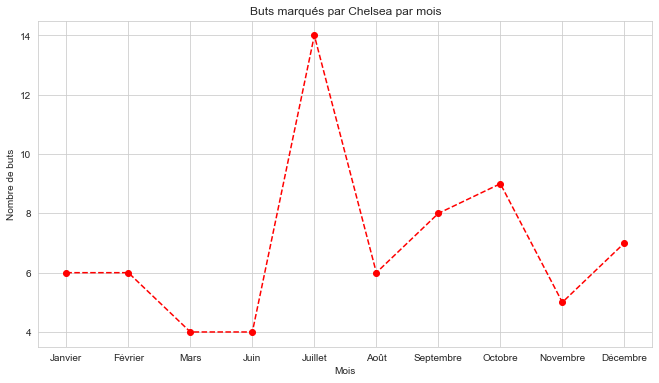

In [70]:
plt.figure(figsize=(11, 6))
plt.plot(df_chelsea_month['date_match'], df_chelsea_month["GF"],marker='o', linestyle='--', color='red')
#plt.plot(df_chelsea_month['date_match'], df_chelsea_month["GF"],marker='o', linestyle='--', color='')

# Titre et labels
plt.title("Buts marqués par Chelsea par mois")
plt.xlabel("Mois")
plt.ylabel("Nombre de buts")

plt.show()

In [ ]:
#### faire la meme chose avec les buts encaisé par moi

### Commentaire *******************************************************************

In [20]:
def _periode(hr):
    if hr <= '15:00':
        return 'matin'
    else:
        return 'soir'


In [22]:
df_chelsea_2019_2020['periode'] = df_chelsea_2019_2020['Time'].apply(_periode)

In [23]:
df_chelsea_nbr_but=df_chelsea_2019_2020.groupby(['Team','periode'])['GF'].sum().reset_index()
df_chelsea_nbr_but

,Team,periode,GF
0,Chelsea,matin,36
1,Chelsea,soir,33


In [24]:
df_chelsea_nbr_match=df_chelsea_2019_2020.groupby(['Team','periode'])['Team'].count().rename('nbr_matchs').reset_index()
df_chelsea_nbr_match

,Team,periode,nbr_matchs
0,Chelsea,matin,18
1,Chelsea,soir,20


In [26]:
df_nbr_match_but=df_chelsea_nbr_but.merge(df_chelsea_nbr_match, on=['Team','periode'])
df_nbr_match_but

,Team,periode,GF,nbr_matchs
0,Chelsea,matin,36,18
1,Chelsea,soir,33,20


In [ ]:
########### commantaire

In [27]:
df_nbr_match_but['mean'] = df_nbr_match_but['GF'] / df_nbr_match_but['nbr_matchs']
df_nbr_match_but

,Team,periode,GF,nbr_matchs,mean
0,Chelsea,matin,36,18,2.00
1,Chelsea,soir,33,20,1.65


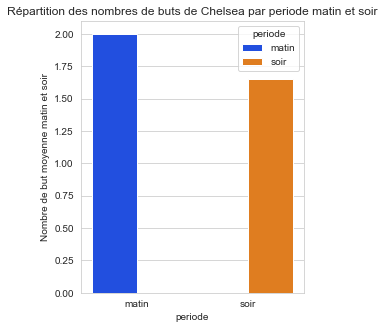

In [31]:
# Données
data = df_nbr_match_but

# Créer le barplot
plt.figure(figsize=(4, 5))
sns.set_style("whitegrid")  # Style du graphique

# Utilisez `hue` pour différencier les résultats (D, L, W) dans le même graphique
sns.barplot(data=data, x="periode", y="mean", hue="periode", palette="bright")

plt.ylabel("Nombre de but moyenne matin et soir")
plt.title("Répartition des nombres de buts de Chelsea par periode matin et soir")
# Afficher le graphique
plt.show()


### Commentaire *******************************************************************

In [36]:
df_chelsea_2019_2020.head()

,Date,Time,Comp,Round,Day,Venue,Result,GF,GA,Opponent,...,Poss,Attendance,Captain,Formation,Referee,Match Report,Notes,Team,date_match,periode
0,2019-08-11,16:30,Premier League,Matchweek 1,Sun,Away,L,0,4,Manchester Utd,...,54,73620.0,César Azpilicueta,4-2-3-1,Anthony Taylor,Match Report,NaN,Chelsea,Août,soir
2,2019-08-18,16:30,Premier League,Matchweek 2,Sun,Home,D,1,1,Leicester City,...,50,40629.0,César Azpilicueta,4-3-3,Oliver Langford,Match Report,NaN,Chelsea,Août,soir
3,2019-08-24,12:30,Premier League,Matchweek 3,Sat,Away,W,3,2,Norwich City,...,54,27032.0,César Azpilicueta,4-3-3,Martin Atkinson,Match Report,NaN,Chelsea,Août,matin
4,2019-08-31,15:00,Premier League,Matchweek 4,Sat,Home,D,2,2,Sheffield Utd,...,62,40560.0,César Azpilicueta,4-3-3,Stuart Attwell,Match Report,NaN,Chelsea,Août,matin
5,2019-09-14,15:00,Premier League,Matchweek 5,Sat,Away,W,5,2,Wolves,...,54,31534.0,César Azpilicueta,3-4-3,Graham Scott,Match Report,NaN,Chelsea,Septembre,matin


In [38]:
df_chelsea_formation=df_chelsea_2019_2020.groupby(['Team','GF'])
df_chelsea_formation

In [43]:
df_chelsea_formation = df_chelsea_2019_2020.groupby(['Team','Result','Formation'])['Formation'].count().rename('nbr_formation').reset_index()
df_chelsea_formation

,Team,Result,Formation,nbr_formation
0,Chelsea,D,3-4-3,1
1,Chelsea,D,4-2-3-1,1
2,Chelsea,D,4-3-3,4
3,Chelsea,L,3-4-3,2
4,Chelsea,L,4-2-3-1,3
5,Chelsea,L,4-3-3,7
6,Chelsea,W,3-4-3,5
7,Chelsea,W,4-2-3-1,4
8,Chelsea,W,4-3-3,11


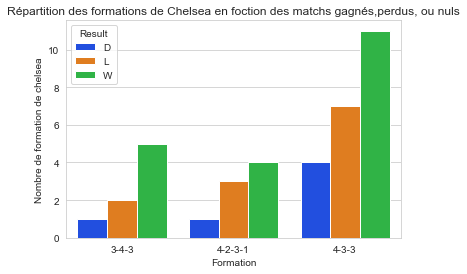

In [44]:
# Données
data = df_chelsea_formation

# Créer le barplot
#plt.figure(figsize=(4, 5))
sns.set_style("whitegrid")  # Style du graphique

# Utilisez `hue` pour différencier les résultats (D, L, W) dans le même graphique
sns.barplot(data=data, x="Formation", y="nbr_formation", hue="Result", palette="bright")

plt.ylabel("Nombre de formation de chelsea")
plt.title("Répartition des formations de Chelsea en foction des matchs gagnés,perdus, ou nuls")
# Afficher le graphique
plt.show()